In [135]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #all last

import pandas as pd
import numpy as np
import os, sys
sys.path.append('F:\my_documnet_F')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from importlib import reload
plt=reload(plt)
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import datetime
import seaborn as sns
from scipy import sparse
# import mglearn

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

#Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2
import matplotlib.ticker as ticker

import imp
import Library.Rawdata_stack as rawstack
imp.reload(rawstack)

<module 'Library.Rawdata_stack' from 'F:\\my_documnet_F\\Library\\Rawdata_stack.py'>

In [30]:
from catboost.datasets import titanic
titanic_train, titanic_test = titanic()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

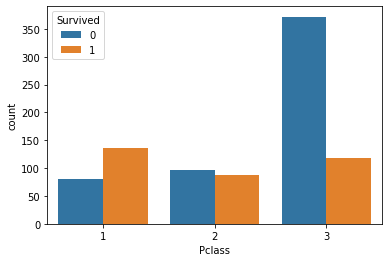

In [31]:
sns.countplot(data = titanic_train, x = 'Pclass', hue = 'Survived')

In [32]:
feature_name = ['Pclass']
x = titanic_train[feature_name]
label_name = 'Survived'
y = titanic_train[label_name]
print(x.head())
print(y.head())

   Pclass
0       3
1       1
2       3
3       1
4       3
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [34]:
model = DecisionTreeClassifier()
model.fit(x, y)


os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
tree = export_graphviz(model, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)

In [35]:
x_test = titanic_test[feature_name]
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

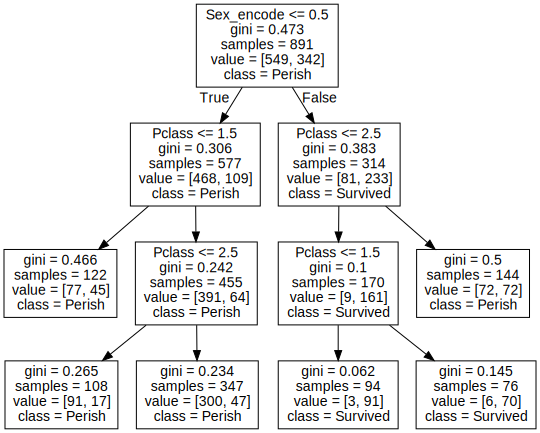

In [36]:
titanic_test['Sex_encode'] = titanic_test['Sex'].map({'male': 0, 'female':1})
titanic_train['Sex_encode'] = titanic_train['Sex'].map({'male': 0, 'female':1})

feature_name = ['Pclass', 'Sex_encode']
x = titanic_train[feature_name]
label_name = 'Survived'
y = titanic_train[label_name]

model.fit(x, y)

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
tree = export_graphviz(model, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)

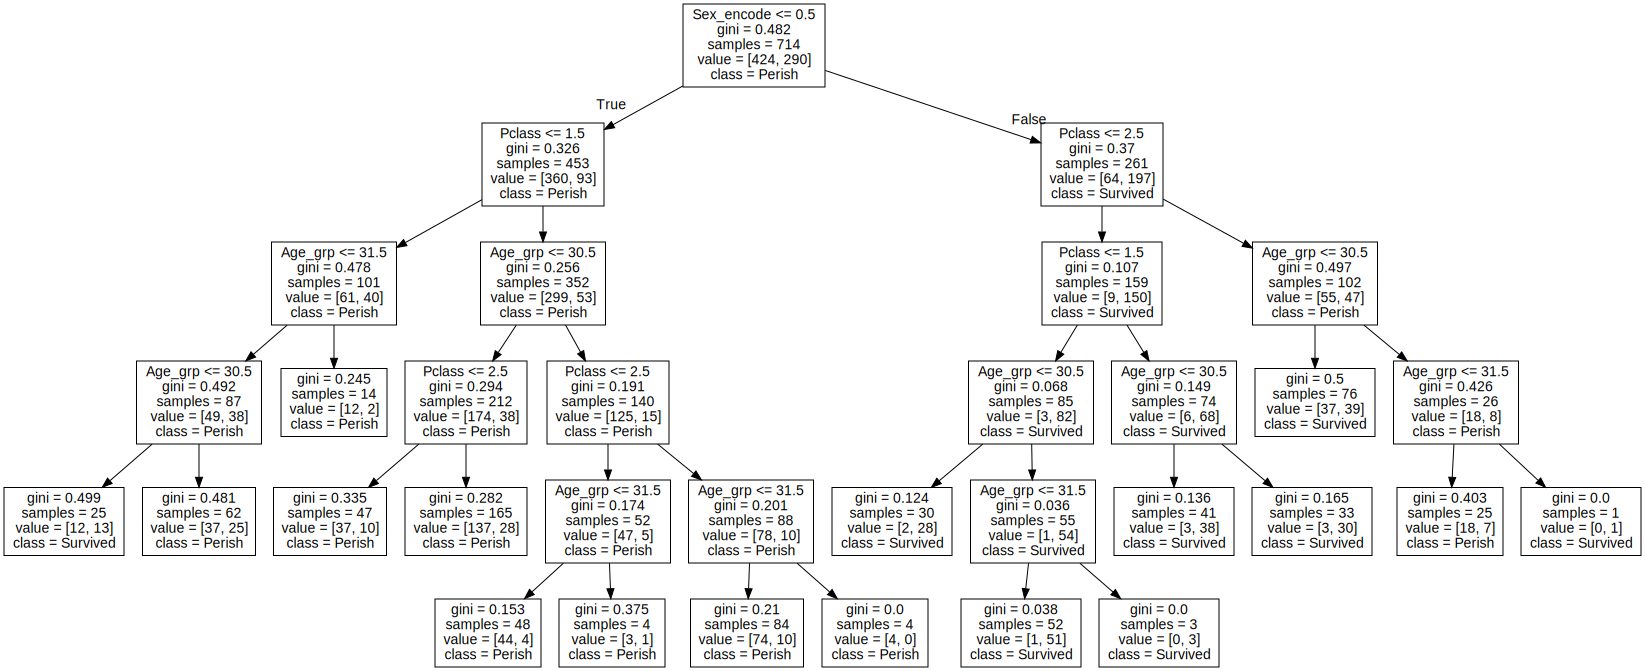

In [37]:
titanic_test = titanic_test[~titanic_test['Age'].isna()]
titanic_train = titanic_train[~titanic_train['Age'].isna()]
titanic_test['Age_grp'] = (titanic_train['Age'] / 30).astype(int) + 30
titanic_train['Age_grp'] = (titanic_train['Age'] / 30).astype(int) + 30

feature_name = ['Pclass', 'Sex_encode', 'Age_grp']
x = titanic_train[feature_name]
label_name = 'Survived'
y = titanic_train[label_name]

model.fit(x, y)

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
tree = export_graphviz(model, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)

In [38]:
titanic_train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")

F:\my_documnet_F\Library\Rawdata_stack.py:88: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(prow, pcol, row+1)


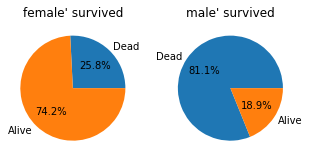

In [39]:
c = rawstack.show_pie_chart(titanic_train, 'Sex')

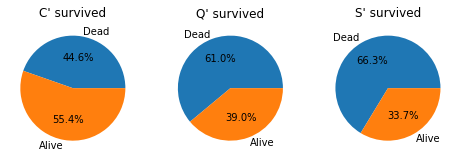

In [40]:
c = rawstack.show_pie_chart(titanic_train, 'Embarked')

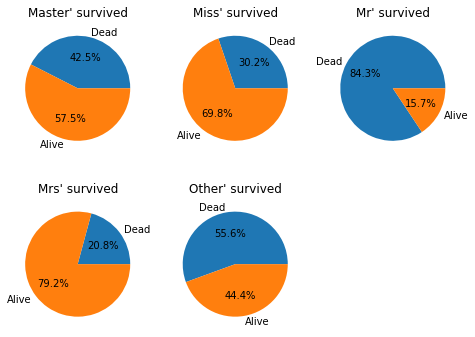

In [41]:
titanic_train['Title'] = titanic_train.Name.str.extract(' ([A-Za-z]+)\.')
titanic_train['Title'].value_counts()

ltitle = ['Mr', 'Miss', 'Mrs', 'Master', 'Other']
titanic_train['Title'] = np.where(titanic_train['Title'].isin(ltitle), titanic_train['Title'], 'Other')

c = rawstack.show_pie_chart(titanic_train, 'Title')

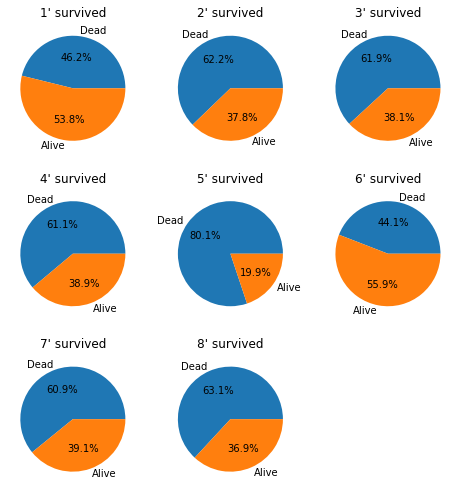

In [42]:
meanAge = titanic_train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
    nullIndex = titanic_train[(titanic_train.Title == index) & (titanic_train.Age.isnull())].index
    titanic_train.loc[nullIndex, 'Age'] = row[0]
titanic_train['AgeCategory'] = pd.qcut(titanic_train.Age, 8, labels = range(1, 9)).astype(int)
c = rawstack.show_pie_chart(titanic_train, 'AgeCategory')

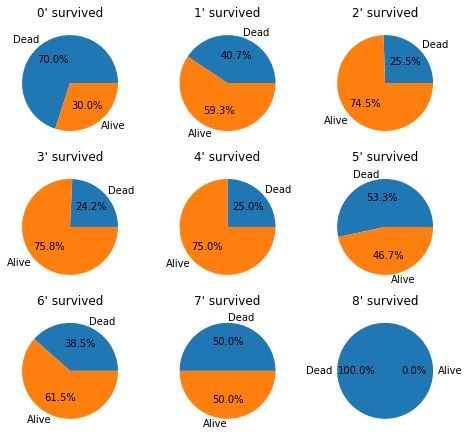

In [43]:
titanic_train.Cabin.fillna('N', inplace = True)
titanic_train['CabinCategory'] = titanic_train['Cabin'].str.slice(start = 0, stop = 1)
dic_cabin = {'N':0, 'C':1, 'B':2, 'D':3, 'E':4, 'A':5, 'F':6, 'G':7, 'T':8}
titanic_train['CabinCategory'] = titanic_train['CabinCategory'].map(dic_cabin)
c = rawstack.show_pie_chart(titanic_train, 'CabinCategory')

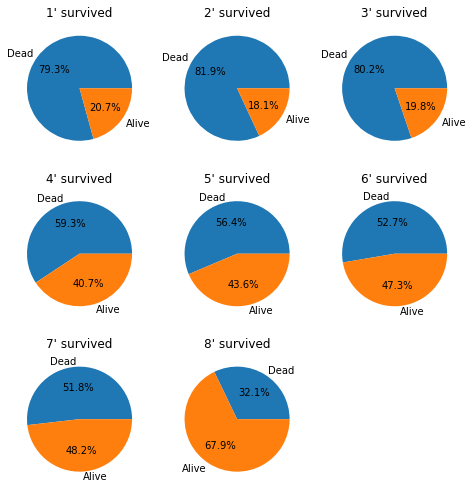

In [44]:
titanic_train['Fare'].fillna(0, inplace = True)
titanic_train['FareCategory'] = pd.qcut(titanic_train.Fare, 8, labels = range(1, 9)).astype(int)
c = rawstack.show_pie_chart(titanic_train, 'FareCategory')

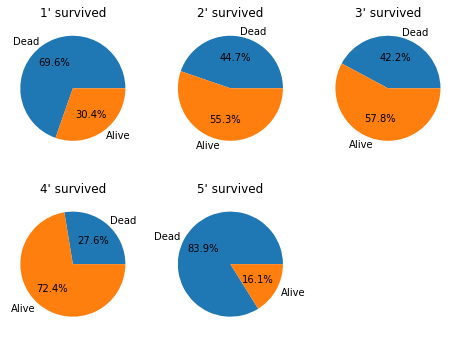

In [45]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1
titanic_train.loc[titanic_train['Family'] > 4, 'Family'] = 5
titanic_train['IsAlone'] = 1
titanic_train.loc[titanic_train['Family'] > 1, 'IsAlone'] = 0
c = rawstack.show_pie_chart(titanic_train, 'Family')

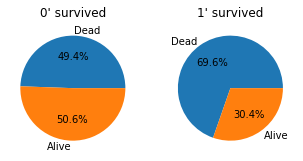

In [46]:
c = rawstack.show_pie_chart(titanic_train, 'IsAlone')

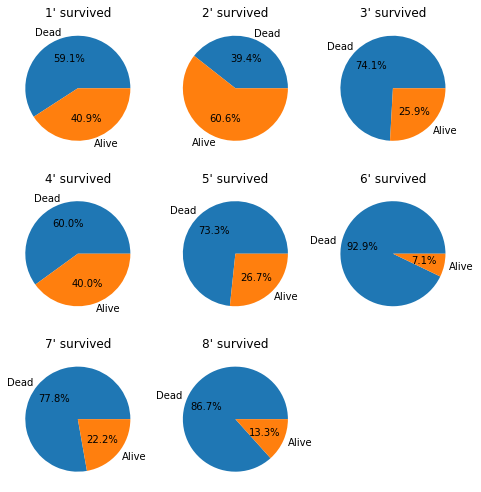

In [47]:
titanic_train['TicketCategory'] =  [i[-1][0] for i  in titanic_train.Ticket.str.split()]
titanic_train['TicketCategory'] = np.where(titanic_train['TicketCategory'].isin(['8', '9', 'L']), '8', titanic_train['TicketCategory'])
titanic_train['TicketCategory'] = pd.factorize(titanic_train['TicketCategory'])[0] + 1
c = rawstack.show_pie_chart(titanic_train, 'TicketCategory')

In [48]:
titanic_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

data std is 14.93
data std is 14.16
The t-statistic and p-value assuming equal variances is -2.067 and 0.039.
The t-statistic and p-value not assuming equal variances is -2.046 and 0.041
The w-statistic and p-value in Survived 0.983 and 0.001
The w-statistic and p-value in Non-Survived 0.969 and 0.000
data std is 0.71
data std is 1.29
The t-statistic and p-value assuming equal variances is -1.054 and 0.292.
The t-statistic and p-value not assuming equal variances is -1.194 and 0.233
The w-statistic and p-value in Survived 0.655 and 0.000
The w-statistic and p-value in Non-Survived 0.484 and 0.000


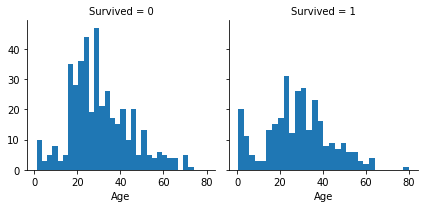

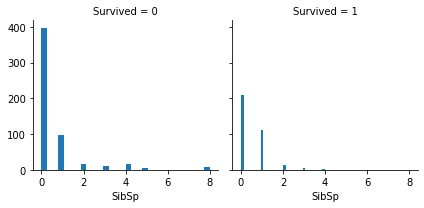

In [186]:
########### random forest analysis ##########
train, test = titanic()

rawstack.valid_features(train[train.Age > 0], 'Age', distribution_check = True)
rawstack.valid_features(train, 'SibSp', distribution_check = True)

In [187]:
wholedata = pd.concat([train,test])
tridx = len(train)
wholedata = wholedata.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)
wholedata['Age'] = wholedata['Age'].fillna(wholedata[wholedata.Age > 0]['Age'].mean())
wholedata['Embarked'] = wholedata['Embarked'].fillna(wholedata.Embarked.value_counts().index[0])
wholedata_encoded = pd.get_dummies(wholedata)
train1 = wholedata_encoded[:tridx]
test1 = wholedata_encoded[tridx:]

In [188]:
data = train1.drop('Survived', axis = 1).values
target = train1['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.4, stratify = target, random_state = 0)
rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 5, oob_score = True, random_state = 10)
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pre_prob = lr.predict_proba(x_test)[:, 1]


accuracy_score(y_pred, y_test)

C:\Users\Chulwoong Oh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.803921568627451

In [189]:
cofmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cofmat)

[[191  29]
 [ 41  96]]


In [190]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pre_prob)

roc_auc = roc_auc_score(y_test, y_pre_prob)

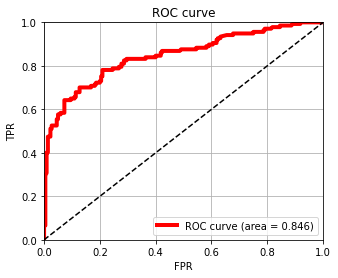

In [191]:
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %0.3f)'%roc_auc, color ='r', linewidth = 4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc = 4)
plt.grid(True)

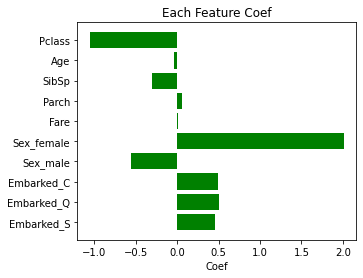

In [197]:
cols = train1.columns.tolist()
cols.remove('Survived')
y_pos = np.arange(len(cols))

plt.rcParams['figure.figsize'] = [5,4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align = 'center', color = 'g', ecolor = 'k')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title('Each Feature Coef')
plt.show()

In [201]:
########### random forest analysis ##########
train, test = titanic()

In [202]:
train = rawstack.feature_engineering(train)
test  = rawstack.feature_engineering(test)

data = train.drop('Survived', axis = 1).values
target = train['Survived'].values

In [203]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.4, stratify = target, random_state = 0)
rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 5, oob_score = True, random_state = 10)

In [204]:
rf.fit(x_train, y_train)
# prediction = rf.predict(x_test)
y_pred = rf.predict(x_test)
accuracy_score(prediction, y_test)
y_pre_prob = rf.predict_proba(x_test)[:, 1]

In [205]:
cofmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cofmat)

[[205  15]
 [ 46  91]]


In [206]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pre_prob)

roc_auc = roc_auc_score(y_test, y_pre_prob)

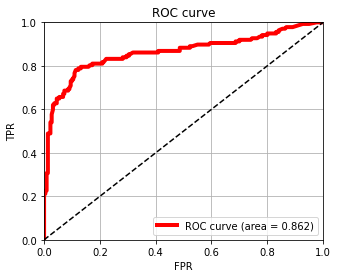

In [207]:
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %0.3f)'%roc_auc, color ='r', linewidth = 4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc = 4)
plt.grid(True)

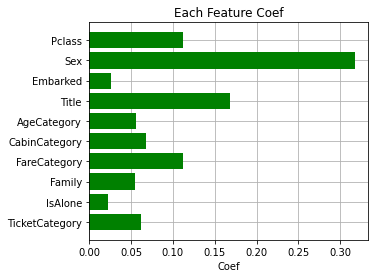

In [211]:
cols = train.columns.tolist()
cols.remove('Survived')
y_pos = np.arange(len(cols))

plt.rcParams['figure.figsize'] = [5,4]
fig, ax = plt.subplots()
ax.barh(y_pos, rf.feature_importances_, align = 'center', color = 'g', ecolor = 'k')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title('Each Feature Coef')
ax.set_axisbelow(True)
plt.grid(True)
plt.show()

In [164]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accuracy_score(prediction, y_test)
y_pre_prob = dtc.predict_proba(x_test)[:, 1]

In [165]:
cofmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cofmat)

[[185  35]
 [ 47  90]]


In [166]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pre_prob)
roc_auc = roc_auc_score(y_test, y_pre_prob)

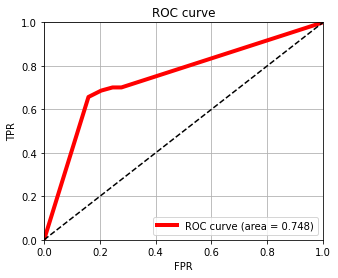

In [167]:
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %0.3f)'%roc_auc, color ='r', linewidth = 4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc = 4)
plt.grid(True)

In [172]:
feature_name = ['Pclass', 'Sex', 'Embarked', 'Title', 'AgeCategory',
       'CabinCategory', 'FareCategory', 'Family', 'IsAlone', 'TicketCategory']

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin'
tree = export_graphviz(dtc, feature_names = feature_name,
                       class_names = ['Perish', 'Survived'])
graphviz.Source(tree)